In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
import datetime as dt
%matplotlib inline

In [223]:
data=pd.read_csv("~/Downloads/Data.V7.csv")
data=data.set_index(data["Date"])
del data["Date"]
del data["NASDAQvolume"]

In [244]:
data.to_csv("Data.V7.csv")

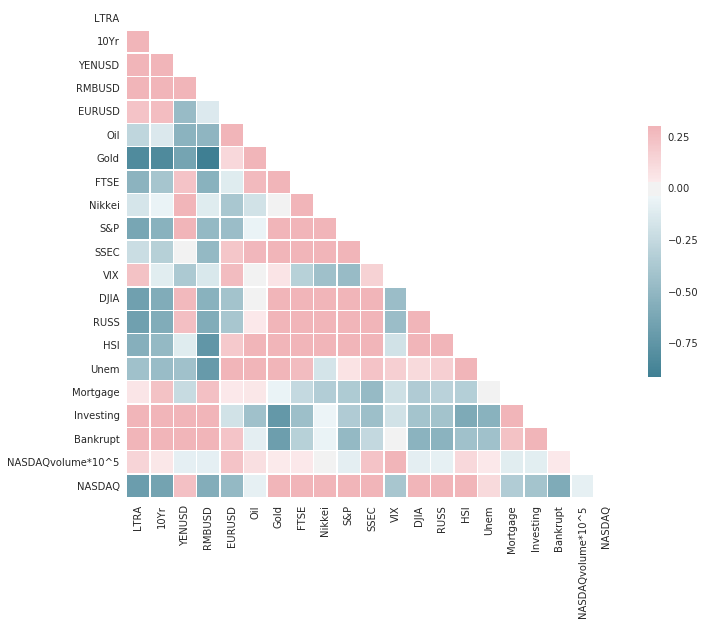

In [224]:
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [225]:
Val1=['LTRA', '10Yr', "RMBUSD",'EURUSD']
Val2=['Unem','Mortgage', 'Investing', 'Bankrupt']
Val3=['YENUSD','Oil','VIX']
Val4=['S&P','Gold','RUSS','NASDAQ']
Val5=['DJIA', 'HSI','Nikkei','FTSE','SSEC',"NASDAQvolume*10^5"]

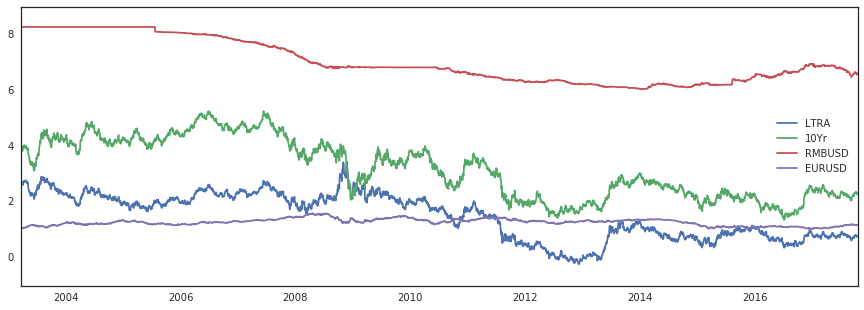

In [226]:
plt.figure(figsize=(15,5))
for i in Val1:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

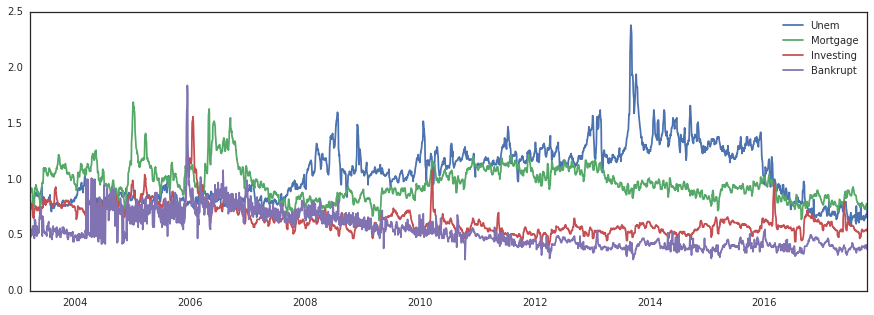

In [227]:
plt.figure(figsize=(15,5))
for i in Val2:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

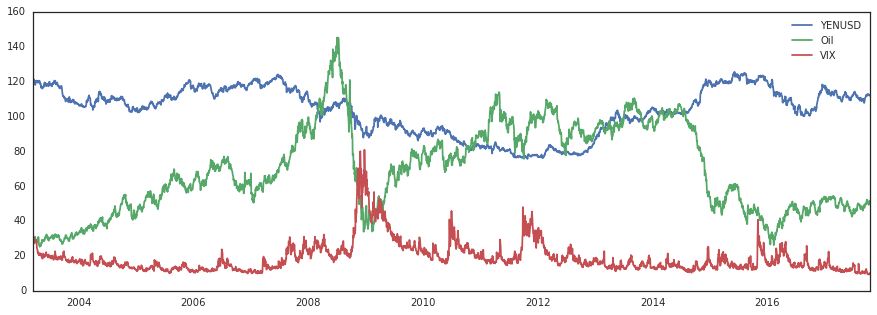

In [228]:
plt.figure(figsize=(15,5))
for i in Val3:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

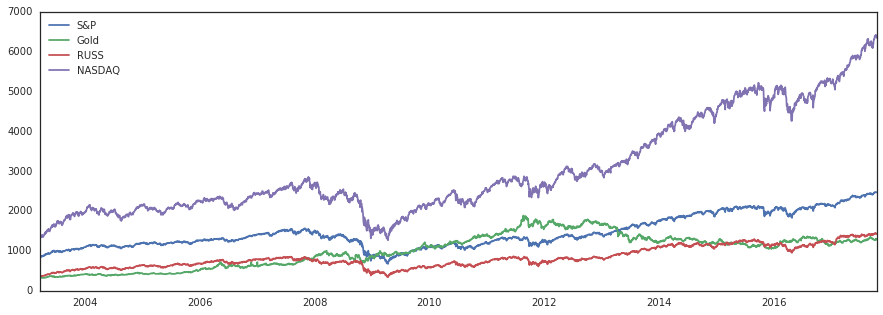

In [229]:
plt.figure(figsize=(15,5))
for i in Val4:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

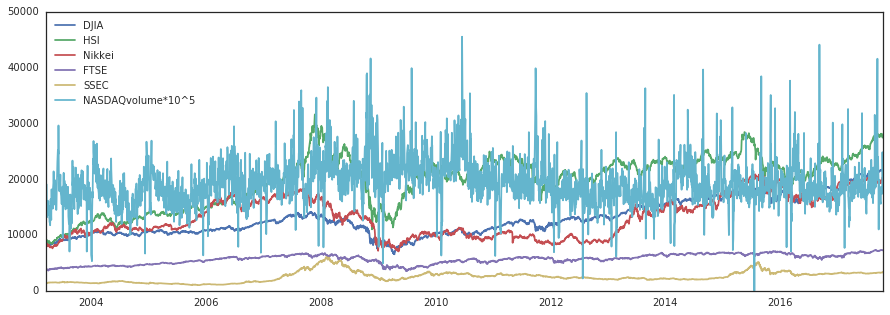

In [230]:
plt.figure(figsize=(15,5))
for i in Val5:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

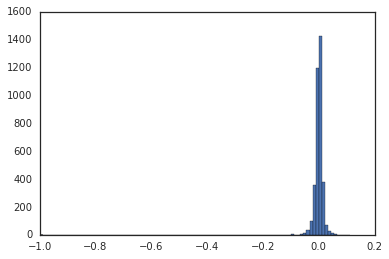

In [233]:
NASDAQLogreturn=[-1] #set the first value to -1 to align dataframe
temp=data["NASDAQ"].values
for i in range(1,len(temp)):
    NASDAQLogreturn.append(np.log(temp[i]/temp[i-1]))
data["NASDAQLogreturn"]=pd.Series(NASDAQLogreturn, index=data.index)
plt.hist(data["NASDAQLogreturn"], bins=100);

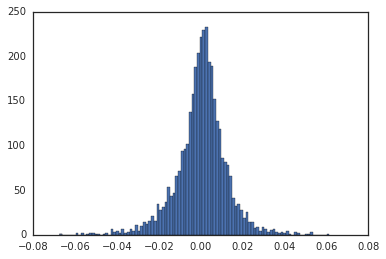

In [235]:
ReturnNoExtreme=sorted(data["NASDAQLogreturn"])[5:-5]
plt.hist(ReturnNoExtreme, bins=100);

In [242]:
NASDAQclass=[100] #set the first value to 100 to align dataframe
temp=data["NASDAQLogreturn"].values
for i in range(1,len(temp)):
    if temp[i]>0.0:
        NASDAQclass.append(1)
    else:
        NASDAQclass.append(-1)
data["NASDAQclass"]=pd.Series(NASDAQclass, index=data.index)

In [243]:
data["NASDAQclass"].value_counts()

 1      1987
-1      1630
 100       1
Name: NASDAQclass, dtype: int64